In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [53]:

file_path = "sms_spam_extended_2000.csv"   # adjust path if needed
df = pd.read_csv(file_path)



In [54]:
df.shape

(2000, 5)

In [55]:
df.head()

,word_freq_free,word_freq_win,word_freq_offer,sms_length,is_spam
0,7,7,11,101,1
1,2,6,3,31,0
2,8,5,9,78,1
3,2,0,10,124,1
4,4,7,4,86,0


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   word_freq_free   2000 non-null   int64
 1   word_freq_win    2000 non-null   int64
 2   word_freq_offer  2000 non-null   int64
 3   sms_length       2000 non-null   int64
 4   is_spam          2000 non-null   int64
dtypes: int64(5)
memory usage: 78.3 KB


In [57]:
df.describe()

,word_freq_free,word_freq_win,word_freq_offer,sms_length,is_spam
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,4.315000,3.421000,5.611000,89.560000,0.746000
std,2.938723,2.244165,3.352506,40.993507,0.435406
min,0.000000,0.000000,0.000000,20.000000,0.000000
25%,2.000000,2.000000,3.000000,51.000000,0.000000
50%,4.000000,3.000000,6.000000,86.000000,1.000000
75%,7.000000,5.000000,8.000000,127.000000,1.000000
max,9.000000,7.000000,11.000000,159.000000,1.000000


In [58]:
df.isnull().sum()

word_freq_free     0
word_freq_win      0
word_freq_offer    0
sms_length         0
is_spam            0
dtype: int64

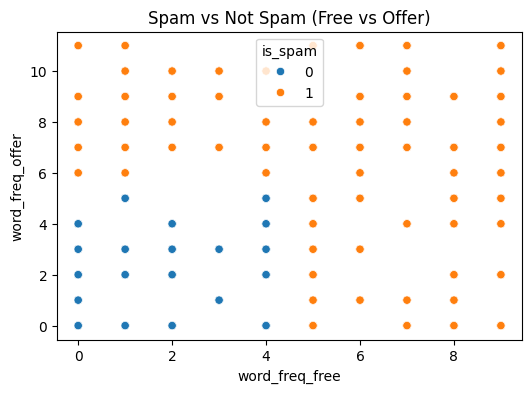

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="word_freq_free", y="word_freq_offer", hue="is_spam")
plt.title("Spam vs Not Spam (Free vs Offer)")
plt.show()

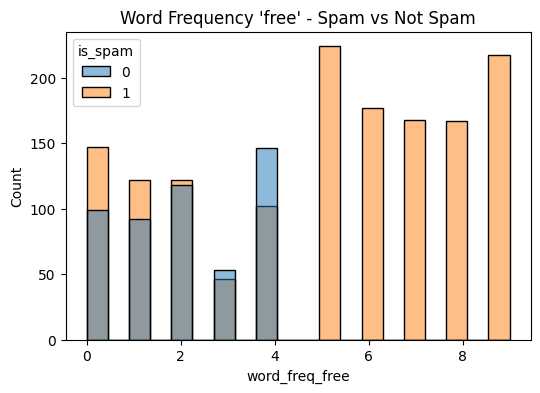

In [60]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x="word_freq_free", hue="is_spam", bins=20)
plt.title("Word Frequency 'free' - Spam vs Not Spam")
plt.show()

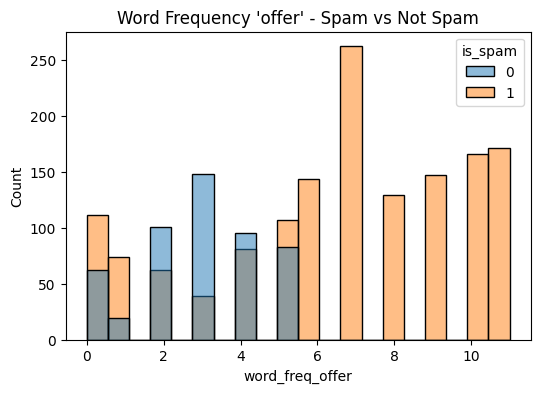

In [61]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x="word_freq_offer", hue="is_spam", bins=20)
plt.title("Word Frequency 'offer' - Spam vs Not Spam")
plt.show()

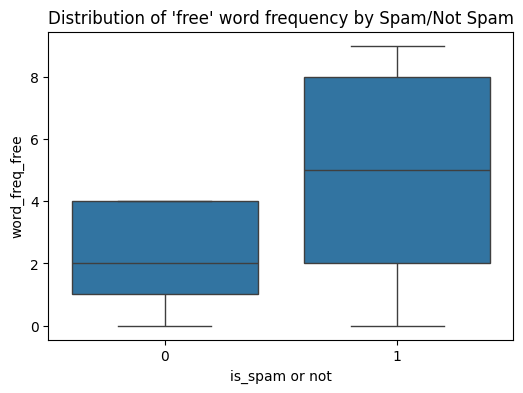

In [62]:
plt.figure(figsize=(6,4))
sns.boxplot(x='is_spam', y='word_freq_free', data=df)

plt.title("Distribution of 'free' word frequency by Spam/Not Spam")
plt.xlabel("is_spam or not")
plt.ylabel("word_freq_free")
plt.show()

In [63]:
x = df.drop("is_spam", axis=1)
y = df["is_spam"]


In [64]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

In [65]:
nb = GaussianNB()
nb.fit(x_train, y_train)

,priors,None
,var_smoothing,1e-09


In [66]:
y_pred = nb.predict(x_test)

In [67]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.945

In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.79      0.89       107
           1       0.93      1.00      0.96       293

    accuracy                           0.94       400
   macro avg       0.97      0.90      0.92       400
weighted avg       0.95      0.94      0.94       400



In [69]:
print(confusion_matrix(y_test, y_pred))

[[ 85  22]
 [  0 293]]


cross-validation

In [70]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
import numpy as np

cv_scores = cross_val_score(nb, x_train, y_train, cv=5, scoring="accuracy")

print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

Cross-validation scores: [0.95    0.95625 0.95625 0.91875 0.9125 ]
Mean CV Accuracy: 0.93875


In [71]:
from sklearn.model_selection import GridSearchCV
param_grid = {"var_smoothing": [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}
grid = GridSearchCV(GaussianNB(), param_grid, cv=5, scoring="accuracy")
grid.fit(x_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

Best Parameters: {'var_smoothing': 1e-09}
Best CV Score: 0.93875


In [72]:
import pickle 

In [73]:
with open("spam_nb_model.sav", "wb") as f:
    pickle.dump(nb, f)

In [74]:
with open("spam_nb_model.sav", "rb") as f:
    loaded_model = pickle.load(f)